In [1]:
#importando a biblioteca do YahooFinance para baixar cotações
import yfinance as yF 

# Imports para manipulação de dados
#import numpy as np
import pandas as pd

# Imports para visualização
import matplotlib.pyplot as plt
%matplotlib inline


# Importando os pacotes para o modelo preditivo
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score



#formatando valores com duas casas decimais
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Carrega o dataset
Cotacoes = yF.Ticker("ITUB3.SA")

# Opções de períodos 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y e ytd.
dados = Cotacoes.history(period="5y")
dados.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-10-25 00:00:00-03:00,22.02,22.51,21.94,22.39,164100,0.00,0.00
2018-10-26 00:00:00-03:00,22.39,22.54,22.13,22.45,103500,0.00,0.00
2018-10-29 00:00:00-03:00,22.46,22.65,21.90,22.26,287550,0.00,0.00
2018-10-30 00:00:00-03:00,22.12,22.97,21.73,22.97,273750,0.00,0.00
2018-10-31 00:00:00-03:00,22.97,23.26,22.54,22.77,254550,0.00,0.00


In [3]:
# Retirar o indice do campo data
dados.reset_index(inplace=True)
dados.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-10-25 00:00:00-03:00,22.02,22.51,21.94,22.39,164100,0.00,0.00
1,2018-10-26 00:00:00-03:00,22.39,22.54,22.13,22.45,103500,0.00,0.00
2,2018-10-29 00:00:00-03:00,22.46,22.65,21.90,22.26,287550,0.00,0.00
3,2018-10-30 00:00:00-03:00,22.12,22.97,21.73,22.97,273750,0.00,0.00
4,2018-10-31 00:00:00-03:00,22.97,23.26,22.54,22.77,254550,0.00,0.00


In [4]:
dados.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
1235,2023-10-19 00:00:00-03:00,22.99,23.40,22.85,23.16,448000,0.00,0.00
1236,2023-10-20 00:00:00-03:00,23.01,23.26,22.86,23.13,253000,0.00,0.00
1237,2023-10-23 00:00:00-03:00,22.97,23.23,22.89,23.04,348000,0.00,0.00
1238,2023-10-24 00:00:00-03:00,23.22,23.29,22.80,23.00,306300,0.00,0.00
1239,2023-10-25 00:00:00-03:00,22.99,23.65,22.97,23.02,219000,0.00,0.00


In [5]:
dados.drop(dados.tail(1).index,inplace=True)
dados.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
1234,2023-10-18 00:00:00-03:00,23.13,23.23,22.86,22.99,620500,0.00,0.00
1235,2023-10-19 00:00:00-03:00,22.99,23.40,22.85,23.16,448000,0.00,0.00
1236,2023-10-20 00:00:00-03:00,23.01,23.26,22.86,23.13,253000,0.00,0.00
1237,2023-10-23 00:00:00-03:00,22.97,23.23,22.89,23.04,348000,0.00,0.00
1238,2023-10-24 00:00:00-03:00,23.22,23.29,22.80,23.00,306300,0.00,0.00


In [6]:
# Vamos excluir as colunas que não serão utilizadas e renomear os campos
dados.drop('Dividends', axis=1, inplace=True)
dados.drop('Stock Splits', axis=1, inplace=True)
dados.columns = ['Data','Abertura','Maximo','Minimo','Fechamento','Volume']
dados.head()

,Data,Abertura,Maximo,Minimo,Fechamento,Volume
0,2018-10-25 00:00:00-03:00,22.02,22.51,21.94,22.39,164100
1,2018-10-26 00:00:00-03:00,22.39,22.54,22.13,22.45,103500
2,2018-10-29 00:00:00-03:00,22.46,22.65,21.90,22.26,287550
3,2018-10-30 00:00:00-03:00,22.12,22.97,21.73,22.97,273750
4,2018-10-31 00:00:00-03:00,22.97,23.26,22.54,22.77,254550


In [7]:
# Vamos observar o nosso range de dados
print('Menor data: ', dados['Data'].min())
print('Maior data:', dados['Data'].max())

Menor data:  2018-10-25 00:00:00-03:00

Maior data: 2023-10-24 00:00:00-03:00


In [8]:
# Vamos observar os dados referente a ultima data do nosso conjunto de dados
display(dados.loc[dados.index.max()])

Data          2023-10-24 00:00:00-03:00
Abertura                          23.22
Maximo                            23.29
Minimo                            22.80
Fechamento                        23.00
Volume                           306300
Name: 1238, dtype: object

In [9]:
# Tipos de Dados
dados.dtypes

Data          datetime64[ns, America/Sao_Paulo]
Abertura                                float64
Maximo                                  float64
Minimo                                  float64
Fechamento                              float64
Volume                                    int64
dtype: object

In [10]:
# Volume de dados
dados.shape

(1239, 6)

In [11]:
# Sumário estatístico
dados.describe()

,Abertura,Maximo,Minimo,Fechamento,Volume
count,1239.00,1239.00,1239.00,1239.00,1239.00
mean,22.51,22.77,22.21,22.49,781363.84
std,2.56,2.55,2.55,2.56,833787.94
min,17.37,17.53,16.92,17.13,79600.00
25%,20.43,20.68,20.13,20.37,392100.00
50%,22.45,22.77,22.17,22.46,600800.00
75%,24.62,24.88,24.32,24.60,916700.00
max,28.04,28.04,27.56,27.87,12082000.00


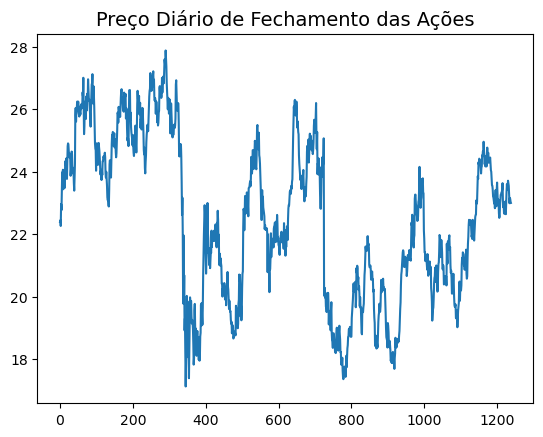

In [12]:
# Plot
plt.plot(dados["Fechamento"])
plt.title("Preço Diário de Fechamento das Ações", size = 14)
plt.show()

In [13]:
dados.head()

,Data,Abertura,Maximo,Minimo,Fechamento,Volume
0,2018-10-25 00:00:00-03:00,22.02,22.51,21.94,22.39,164100
1,2018-10-26 00:00:00-03:00,22.39,22.54,22.13,22.45,103500
2,2018-10-29 00:00:00-03:00,22.46,22.65,21.90,22.26,287550
3,2018-10-30 00:00:00-03:00,22.12,22.97,21.73,22.97,273750
4,2018-10-31 00:00:00-03:00,22.97,23.26,22.54,22.77,254550


In [14]:
# Criando novos campos de Média Movel com 5 Dias, 14 Dias e 21 Dias
dados['mm5d'] = dados['Fechamento'].rolling(5).mean()
dados['mm14d'] = dados['Fechamento'].rolling(14).mean()
dados['mm21d'] = dados['Fechamento'].rolling(21).mean()

In [15]:
dados.head(30)

,Data,Abertura,Maximo,Minimo,Fechamento,Volume,mm5d,mm14d,mm21d
0,2018-10-25 00:00:00-03:00,22.02,22.51,21.94,22.39,164100,NaN,NaN,NaN
1,2018-10-26 00:00:00-03:00,22.39,22.54,22.13,22.45,103500,NaN,NaN,NaN
2,2018-10-29 00:00:00-03:00,22.46,22.65,21.90,22.26,287550,NaN,NaN,NaN
3,2018-10-30 00:00:00-03:00,22.12,22.97,21.73,22.97,273750,NaN,NaN,NaN
4,2018-10-31 00:00:00-03:00,22.97,23.26,22.54,22.77,254550,22.57,NaN,NaN
5,2018-11-01 00:00:00-03:00,22.68,23.41,22.68,23.41,194100,22.77,NaN,NaN
6,2018-11-05 00:00:00-02:00,23.41,23.98,23.38,23.98,501450,23.08,NaN,NaN
7,2018-11-06 00:00:00-02:00,23.96,24.02,23.64,23.72,170100,23.37,NaN,NaN
8,2018-11-07 00:00:00-02:00,23.81,24.11,23.73,24.06,157800,23.59,NaN,NaN
9,2018-11-08 00:00:00-02:00,24.06,24.18,23.41,23.44,159900,23.72,NaN,NaN


In [16]:
dados.dropna(inplace=True)

In [17]:
dados.shape

(1219, 9)

In [19]:
qtd_linhas = len(dados)
qtd_linhas_treino = qtd_linhas - 400
qtd_linhas_teste = qtd_linhas - 20

qtd_linhas_validacao = qtd_linhas_treino - qtd_linhas_teste

info = (
    f"linhas treino = 0:{qtd_linhas_treino}"
    f" linhas teste = 0:{qtd_linhas_treino}:{qtd_linhas_teste}"
    f" linhas validacao = 0:{qtd_linhas_teste}:{qtd_linhas}"

)

info

'linhas treino = 0:819 linhas teste = 0:819:1199 linhas validacao = 0:1199:1219'

In [20]:
# Separando variaveis PREDITORAS e variavel ALVO
preditoras = dados.drop(['Data', 'Fechamento','Volume'], 1)
target = dados['Fechamento']

In [21]:
preditoras.head()

,Abertura,Maximo,Minimo,mm5d,mm14d,mm21d
20,23.99,24.36,23.75,24.17,23.96,23.60
21,24.36,24.82,24.18,24.29,24.04,23.72
22,24.78,24.98,24.62,24.39,24.10,23.84
23,24.93,25.23,24.71,24.54,24.20,23.96
24,25.26,25.39,24.50,24.72,24.25,24.04


In [22]:
preditoras.tail()

,Abertura,Maximo,Minimo,mm5d,mm14d,mm21d
1234,23.13,23.23,22.86,23.44,23.26,23.19
1235,22.99,23.40,22.85,23.33,23.27,23.17
1236,23.01,23.26,22.86,23.23,23.28,23.15
1237,22.97,23.23,22.89,23.12,23.29,23.15
1238,23.22,23.29,22.80,23.06,23.32,23.15


In [23]:
# Normalizando os dados
scaler = MinMaxScaler().fit(preditoras)
preditoras_normalizadas = scaler.transform(preditoras)

In [24]:
# Verificando a normalização realizada
print('Preditoras: ', preditoras_normalizadas.shape)
print(preditoras_normalizadas)

Preditoras:  (1219, 6)

[[0.62079872 0.65048147 0.64211182 0.66018152 0.6608732  0.63090627]

 [0.65481685 0.69420804 0.68228077 0.67249613 0.66909006 0.64354312]

 [0.6948827  0.70955088 0.72396534 0.68209218 0.67542941 0.65636217]

 ...

 [0.52854256 0.54536912 0.55825006 0.5667504  0.58898474 0.58119266]

 [0.52479067 0.54251362 0.56107103 0.55663031 0.59056285 0.58102408]

 [0.54823939 0.54822463 0.55260777 0.55067731 0.59326817 0.58174121]]


In [25]:
# Separando dados para treino e teste
X_Train = preditoras_normalizadas[:qtd_linhas_treino]
X_test = preditoras_normalizadas[qtd_linhas_treino:qtd_linhas_teste]

Y_Train = target[:qtd_linhas_treino]
Y_test = target[qtd_linhas_treino:qtd_linhas_teste]

print(len(X_Train), len(Y_Train))
print(len(X_test), len(Y_test))

819 819

380 380


In [26]:
# Treinamento usando regressão linear
lr = linear_model.LinearRegression()
lr.fit(X_Train, Y_Train )
predicao = lr.predict(X_test)
cd = r2_score(Y_test, predicao)

f'Coeficiente de determinação:{cd * 100:.2f}'

#Lembrete: Coeficiente de determinação determina a aproximação da linha de regressão.
# Quanto mais próximo de 1 melhor.

'Coeficiente de determinação:99.50'

In [27]:
# Treinamento usando regressão linear
rn = MLPRegressor(max_iter = 2000)
rn.fit(X_Train, Y_Train )
predicao = rn.predict(X_test)
cd = rn.score(X_test,Y_test)

f'Coeficiente de determinação:{cd * 100:.2f}'

#Lembrete: Coeficiente de determinação determina a aproximação da linha de regressão.
# Quanto mais próximo de 1 melhor.

'Coeficiente de determinação:98.93'

In [28]:
# Executando a previsão
previsao = preditoras_normalizadas[qtd_linhas_teste:qtd_linhas]
data_pregao_full = dados['Data']
data_pregao = data_pregao_full[qtd_linhas_teste:qtd_linhas]

res_full = dados['Fechamento']
res = res_full[qtd_linhas_teste:qtd_linhas]

pred = lr.predict(previsao)

df = pd.DataFrame({'Data_Pregão':data_pregao, 'Real': res, 'Previsão':pred})

df.set_index('Data_Pregão', inplace = True)

df

,Real,Previsão
Data_Pregão,,
2023-09-26 00:00:00-03:00,22.67,22.72
2023-09-27 00:00:00-03:00,22.65,22.66
2023-09-28 00:00:00-03:00,23.00,22.94
2023-09-29 00:00:00-03:00,23.04,23.02
2023-10-02 00:00:00-03:00,22.83,22.81
2023-10-03 00:00:00-03:00,22.64,22.62
2023-10-04 00:00:00-03:00,23.03,22.97
2023-10-05 00:00:00-03:00,23.37,23.33
2023-10-06 00:00:00-03:00,23.60,23.58


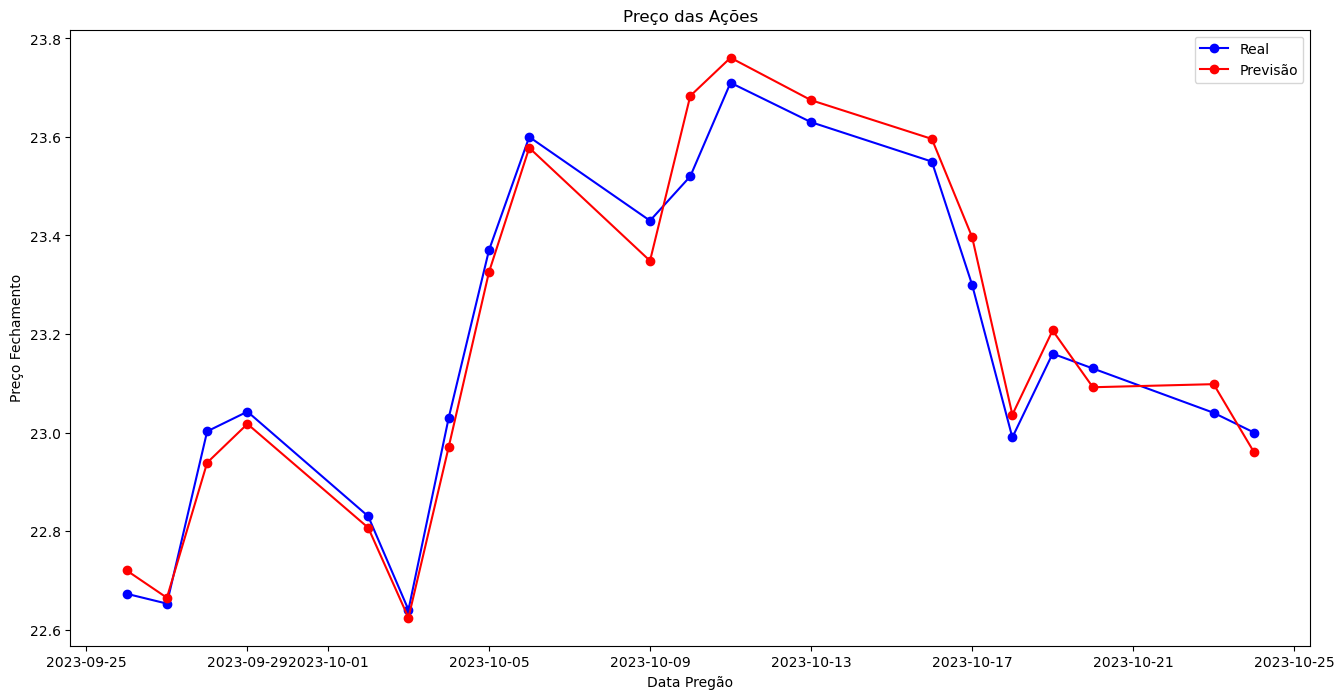

In [29]:
# Gerando o Gráfico
plt.figure(figsize = (16,8))
plt.title('Preço das Ações')
plt.plot(df['Real'], label = 'Real', color = 'blue', marker = 'o')
plt.plot(df['Previsão'], label = 'Previsão', color = 'red', marker = 'o')
plt.xlabel('Data Pregão')
plt.ylabel('Preço Fechamento')
leg = plt.legend()